In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = np.load("box_plus.npy")

In [4]:
data.shape

(14490, 142)

In [5]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout ,  Flatten,  Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Input , concatenate 
from tensorflow.keras.models import Model

In [7]:
def dense_simple():
    input1 = Input(shape=(141))
    x = Dense(128 , activation = 'relu')(input1)
    x = Dense(128 , activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.01)(x)
    x = Dense(256 , activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.01)(x)
    x = Dense(64 , activation = 'relu')(x)
    x = Dropout(0.01)(x)
    outputs = Dense(1 , activation = 'sigmoid')(x)
    model = Model(inputs = input1, outputs = outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])
    return model

In [8]:
model = dense_simple()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 141)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               18176     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)   

In [9]:
data[:,:-1].shape, data[:,-1].shape

((14490, 141), (14490,))

In [11]:
model.fit(data[:,:-1], data[:,-1], epochs=50, verbose=0)
model.fit(data[:,:-1], data[:,-1], epochs=1)

Train on 14490 samples
14490/14490 [==============================] - 2s 168us/sample - loss: 0.0935 - acc: 0.9588 - f1_m: 0.7155 - precision_m: 0.7613 - recall_m: 0.7295


In [45]:
data.shape

(8130, 14)

In [46]:
# add columns to data
## check stats
## add to rules
column_header = ["b1x1", "b1y1", "b1x2", "b1y2", "b2x1", "b2y1", "b2x2", "b2y2", "distance", "distance_score", "angle", "xintersection", "yintersection", "label"]
index = [x for x in range(data.shape[0])]
df = pd.DataFrame(data, index=index, columns=column_header)

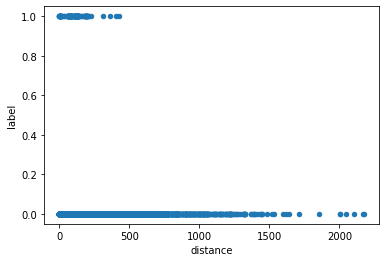

In [47]:
# plo
ax = df.plot.scatter(x="distance", y="label")

In [57]:
## svm classificationfr
from sklearn import svm, datasets

In [58]:
X = data[:,:-1]
y = data[:,-1]
X.shape, y.shape


((14490, 141), (14490,))

In [59]:
#h = .
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
print("svc completed ")
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
print("rbf svc completed ")
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
print("ploy svc completed ")
lin_svc = svm.LinearSVC(C=C).fit(X, y)
print("linear svc completed ")

In [ ]:
svc.score(X,y),  rbf_svc.score(X,y), poly_svc.score(X,y), lin_svc.score(X, y)

(0.9824108241082411, 1.0, 0.9824108241082411, 0.9824108241082411)

ValueError: X.shape[1] = 2 should be equal to 13, the number of features at training time

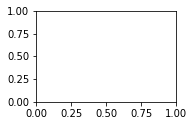

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()